# In this file we test all NFT functions from nft_analyse.py

## Import

In [1]:
import sys
# adding signal_handling to the system path
sys.path.insert(0, '../signal_handling/')
sys.path.insert(0, '../nft_handling/')
sys.path.insert(0, '../PJTpy/')

from FNFTpy import nsev, nsev_poly
from FNFTpy import nsev_inverse, nsev_inverse_xi_wrapper
import numpy as np
import pandas as pd
import random
import timeit
from tqdm import tqdm
from scipy.fft import fft, ifft, fftfreq, fftshift, ifftshift

import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import plotly.graph_objects as go

from importlib import reload

import ssfm
reload(ssfm)

import signal_generation as sg
reload(sg)

import nft_analyse as nft
reload(nft)

import test_signals
reload(test_signals)
from PJTpy import pjt

## Create signal

t = -32.0 32.0 4096
xi_old  = -100.45734582127977 100.5064212222672
xi_fnft = -100.45734582127979 100.5064212222672
2 [0.+1.5j 0.+0.5j]


C:\Users\Igor\YandexDisk\Code\1\nft-processing\notebooks\../nft_handling\test_signals.py:17: RuntimeWarning:

invalid value encountered in divide

C:\Users\Igor\YandexDisk\Code\1\nft-processing\notebooks\../nft_handling\test_signals.py:33: RuntimeWarning:

invalid value encountered in divide



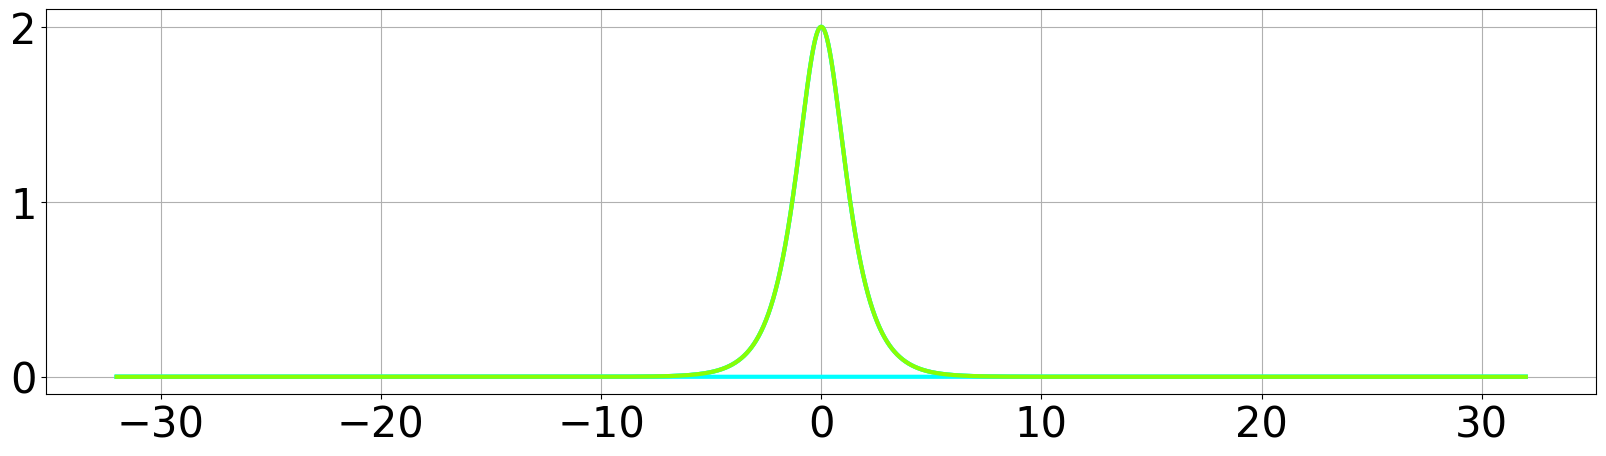

In [115]:
ampl = 2
chirp = 0.0

t_span = 64.0
n_t = 2 ** 12

dt = t_span / (n_t-1)
t = np.array([(i + 0) * dt - t_span / 2 for i in range(n_t)])
print("t =", t[0], t[-1], len(t))

xi_span = np.pi / dt
n_xi = n_t # 2 ** 8
d_xi = xi_span / n_xi
xi = np.array([(i + 1) * d_xi - xi_span / 2. for i in range(n_xi)])
print("xi_old  =", xi[0], xi[-1])
# For FNFT (the same + d_xi to all values)
rv, xi_val = nsev_inverse_xi_wrapper(n_t, t[0], t[-1], n_xi)
xi = xi_val[0] + np.arange(n_xi) * (xi_val[1] - xi_val[0]) / (n_xi - 1)
d_xi = xi[1] - xi[0]

print("xi_fnft =", xi[0], xi[-1])
q, a_xi, b_xi, xi_discr, b_discr, r_discr, ad_discr = test_signals.get_sech(t, xi, a=ampl, c=chirp)
#q *= np.exp(1j*np.pi/3 + 2j*t)
#q = np.roll(q, -int(n_t/30))
print(len(xi_discr), xi_discr)
z_prop = 0.0
q_prop = ssfm.fiber_propagate(q, t_span, z_prop, n_span=2 ** 9, gamma=1, beta2=-1)

matplotlib.rcParams.update({'font.size': 30})
# color = ['red', 'blue', 'green', 'xkcd:light purple', 'xkcd:cyan']
fig, axs = plt.subplots(1, 1, figsize=(20, 5))
axs.plot(t, np.absolute(q), 'xkcd:cyan', linewidth=3)
axs.plot(t, np.real(q), 'xkcd:cyan', linewidth=3)
axs.plot(t, np.imag(q), 'xkcd:cyan', linewidth=3)
axs.plot(t, np.absolute(q_prop), 'xkcd:lime green', linewidth=3)
axs.grid(True)

# print(b_xi)

In [ ]:
result_cont = nft.get_continuous_spectrum(q, t, xi=None, type='fnft', xi_upsampling=1, fnft_type=0, nft_type='tes4', res_poly=None, coefficient_type='left')

a = result_cont['a']
b = result_cont['b']
r = result_cont['r']

fig = go.Figure()
fig.add_trace(go.Scatter(x=xi, y=r.real))
fig.add_trace(go.Scatter(x=xi, y=r.imag))
fig.show()

In [ ]:
r3 = np.roll(r, 1)
r3[0] = np.conj(r3[0])

#omega_r = fftshift(ifft(r[::-1])) * n_t / t_span / 2
omega_r = fftshift(fft(np.roll(r,1))) / 2 / t_span
omega_r = fftshift(fft(r)) / 2 / t_span

#omega_r *= np.exp(-1j * np.pi * t / t_span * (n_t - 1) / n_t * (-1))

print("r = ", r)
print("r = ", np.roll(r, 1))
for i in range(len(omega_r)):
    if i % 2:
        omega_r[i] = - omega_r[i]
    print("omega_r[", i, "] =", omega_r[i])
#omega_r = omega_r[::-1]
#omega_r = np.append(omega_r[0], omega_r)
#omega_r = np.append(omega_r[-1], omega_r)
#omega_r = np.append(omega_r, omega_r[0])

ind_t = 1

# первое 1/n_t берется из определения FFT
xi2 = np.roll(np.fft.fftshift(np.fft.fftfreq(n_xi)),-1) * np.pi / t_span * (n_t - 1)
print(np.roll(np.fft.fftshift(np.fft.fftfreq(n_xi)),-1))
xi2[-1] *= -1
print("xi2 =", xi2)
print("xi  =", xi)
print(xi2[-1] * t_span / np.pi * n_xi)
#print("omega1 =", 0.5/t_span * (r[0] * np.exp(-2 * np.pi * 1j * 1 * 0 / 2) + r[1] * np.exp(-1j * (1 * t_span/(n_t - 1)) * xi2[1])))

ind_t = 0
print("omega0 =", 0.5 / np.pi * d_xi * (
                                 + r[0] * np.exp(-1j * (ind_t/(n_t - 1)) * (np.pi *0/n_xi))
                                 + r[1] * np.exp(-1j * (ind_t/(n_t - 1)) * (np.pi *1/n_xi))
                                 + r[2] * np.exp(-1j * (ind_t/(n_t - 1)) * (np.pi *2/n_xi))
                                 + r[3] * np.exp(-1j * (ind_t/(n_t - 1)) * (np.pi *3/n_xi))
                                ))
print("omega0_FFT =", 0.5 / t_span * (
                                 + r[0] * np.exp(-2j * np.pi * ind_t / n_t * -2)
                                 + r[1] * np.exp(-2j * np.pi * ind_t / n_t * 1)
                                 + r[2] * np.exp(-2j * np.pi * ind_t / n_t * 0)
                                 + r[3] * np.exp(-2j * np.pi * ind_t / n_t * 1)
                                ))
ind_t = 1
print("omega1 =", 0.5 / np.pi * d_xi * (
                                 + r[0] * np.exp(-1j * t[ind_t] * xi[0])
                                 + r[1] * np.exp(-1j * t[ind_t] * xi[1])
                                 + r[2] * np.exp(-1j * t[ind_t] * xi[2])
                                 + r[3] * np.exp(-1j * t[ind_t] * xi[3])
                                ))
print("omega1 =", 0.5 / np.pi * d_xi * (
                                 + r[0] * np.exp(-1j * (ind_t / (n_t-1) * t_span) * xi2[0])
                                 + r[1] * np.exp(-1j * (ind_t / (n_t-1) * t_span) * xi2[1])
                                 + r[2] * np.exp(-1j * (ind_t / (n_t-1) * t_span) * xi2[2])
                                 + r[3] * np.exp(-1j * (ind_t / (n_t-1) * t_span) * xi2[3])
                                ))
print("omega1 =", 0.5 / np.pi * d_xi * (
                                 + r[0] * np.exp(-1j * (ind_t / (n_t-1) * t_span) * (np.pi / t_span * (n_t - 1) / n_t) * -1)
                                 + r[1] * np.exp(-1j * (ind_t / (n_t-1) * t_span) * (np.pi / t_span * (n_t - 1) / n_t) * 0)
                                 + r[2] * np.exp(-1j * (ind_t / (n_t-1) * t_span) * (np.pi / t_span * (n_t - 1) / n_t) * 1)
                                 + r[3] * np.exp(-1j * (ind_t / (n_t-1) * t_span) * (np.pi / t_span * (n_t - 1) / n_t) * 2)
                                ))
print("omega1 =", 0.5 / np.pi * d_xi * (
                                 + r[0] * np.exp(-1j * np.pi * ind_t / n_t * -1)
                                 + r[1] * np.exp(-1j * np.pi * ind_t / n_t * 0)
                                 + r[2] * np.exp(-1j * np.pi * ind_t / n_t * 1)
                                 + r[3] * np.exp(-1j * np.pi * ind_t / n_t * 2)
                                ))
print("omega1_FFT =", 0.5 / t_span * (
                                 + r[0] * np.exp(-2j * np.pi * ind_t / n_t * 0)
                                 + r[1] * np.exp(-2j * np.pi * ind_t / n_t * 1)
                                 + r[2] * np.exp(-2j * np.pi * ind_t / n_t * 2)
                                 + r[3] * np.exp(-2j * np.pi * ind_t / n_t * 3)
                                ))
print("omega1_FFT =", 0.5 / t_span * (
                                 + r[2] * np.exp(-2j * np.pi * ind_t / n_t * -2)
                                 + r[3] * np.exp(-2j * np.pi * ind_t / n_t * -1)
                                 + r[0] * np.exp(-2j * np.pi * ind_t / n_t * 0)
                                 + r[1] * np.exp(-2j * np.pi * ind_t / n_t * 1)
                                ))
print("omega1_FFT =", 0.5 / t_span * (
                                 + r[0] * np.exp(-2j * np.pi * ind_t / n_t * -1)
                                 + r[1] * np.exp(-2j * np.pi * ind_t / n_t * 0)
                                 + r[2] * np.exp(-2j * np.pi * ind_t / n_t * 1)
                                 + r[3] * np.exp(-2j * np.pi * ind_t / n_t * 2)
                                ))
fig.add_trace(go.Scatter(x=t, y=omega_r.real))
fig.add_trace(go.Scatter(x=t, y=omega_r.imag))
fig.show()

In [ ]:
np.exp(-1j * (3 / (n_t-1) * t_span) * (np.pi / t_span * (n_t - 1) / n_t) * 3)

In [ ]:
omega_r = np.zeros(n_t, dtype=np.complex128)
c = 0.5 / np.pi * 0.5 * d_xi
print(d_xi)
for j in range(n_t):
    exp_xi_t = np.exp(-1.0j * t[j] * xi)
    print("t[j] =", t[j])
    print("xi =", xi)
    print("r =", r)
    print("exp_xi_t =", exp_xi_t)

    x = r * exp_xi_t
    print("x =", x)
    xi2 = np.roll(np.fft.fftshift(np.fft.fftfreq(n_xi)),1) * np.pi / t_span
    xi2[-1] *= -1
    print("xi=", xi2)
    print("xi_div=", (n_t/2 + 1) / n_t)
    #omega_r[j] = 0.5 / np.pi * trapz(x, dx=d_xi)  # trapz method to integrate

    omega_r[j] = 2 * c * np.sum(x)  # left Riemann sum
    # print("omega_r[j]=", omega_r[j])
    # omega_r[j] = c * (np.sum(x[0:len(x) - 1]) + np.sum(x[1:len(x)]))  # middle Riemann sum
    print(j, omega_r[j])

fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=omega_r.real))
fig.add_trace(go.Scatter(x=t, y=omega_r.imag))
fig.show()

## WITHOUT PROPAGATION

In [118]:
import nft_analyse as nft
reload(nft)

xi_upsampling = 1
forward_continuous_type= 'fnft' #'fnft' 'slow'
forward_discrete_type='fnft' # 'fnft' 'pjt'
forward_discrete_coef_type='bi-direct'
inverse_type='both'
fnft_type=0 # 0 = MOD_AL, 5 = 2SPLIT2B, 21 = 4SPLIT4B, 27 = TES4
nft_type='tes4'
use_contour = False
n_discrete_skip = 2

res_dbp = nft.make_dbp_nft(q, t, 0, xi_upsampling=xi_upsampling,
                           forward_continuous_type=forward_continuous_type,
                           forward_discrete_type=forward_discrete_type,
                           forward_discrete_coef_type=forward_discrete_coef_type,
                           inverse_type=inverse_type,
                           fnft_type=fnft_type, nft_type=nft_type,
                           use_contour=use_contour, n_discrete_skip=n_discrete_skip,
                           print_sys_message=True)

q_tib_total = res_dbp['q_total']
q_tib_left = res_dbp['q_tib_left']
q_tib_right = res_dbp['q_tib_right']
q_fnft = res_dbp['q_fnft']

xi_d_calculated = res_dbp['xi_d']
print("eig_num:", xi_d_calculated)
print("eig_exact:", xi_discr)
print("bd_num:", res_dbp['bd_prop'])
print("b_prop =", res_dbp['b_prop'][int(n_t/2)])
print("q_tib_total=", q_tib_total[int(n_t/2)])
print("q_fnft=", q_fnft[int(n_t/2)])


# for fnft len(xi) == len(q)
res = nsev_inverse(xi, t, b_xi, xi_discr, b_discr / ad_discr, cst=1, dst=0, dis=fnft_type)
q_fnft_still = res['q']

print(np.shape(b_xi), np.shape(xi))

-100.45734582128013 100.50642122226756
Time to calculate discrete spectrum 219.42700000000002 ms
Number of discrete eigenvalues: 2
b:  (1.9185303034292493e-16-4.97052185178286e-16j) (1.2668221006423738e-16-4.711638877228343e-16j) (-2.2824698107126055e-16+5.014459152001518e-16j) (-1.8302173421351028e-16+5.435871463897983e-16j)
Time to calculate continuous part of Omega 0.998 ms
Time to calculate discrete part of Omega 243.34900000000002 ms
Time to calculate TIB 1184.952 ms
Time to calculate continuous part of Omega 0.9959999999999999 ms
Time to calculate discrete part of Omega 0.0 ms
Time to calculate TIB 17.953 ms
Time to calculate all TIBs 1448.248 ms
Time to calculate inverse FNFT 60.838 ms
eig_num: [ 4.62850901e-38+0.49999864j -2.73691106e-48+1.49998779j]
eig_exact: [0.+1.5j 0.+0.5j]
bd_num: [ 0.95677096-1.04720141e-37j -0.97519948+1.75496285e-48j]
b_prop = (0.0010106680649003819-2.7235711261833955e-15j)
q_tib_total= (2.0000184190108814+1.4433187619653613e-15j)
q_fnft= (2.0010004501

In [119]:
color = ['red', 'blue', 'green', 'xkcd:light purple', 'xkcd:cyan', 'xkcd:lime green']
fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=np.real(q_tib_total), name="q_tib_total"))
fig.add_trace(go.Scatter(x=t, y=np.real(q_fnft), name="q_fnft"))
#fig.add_trace(go.Scatter(x=t, y=np.real(q_fnft_still), name="q_fnft_still"))
fig.add_trace(go.Scatter(x=t, y=np.real(q), name="q"))
fig.show()

color = ['red', 'blue', 'green', 'xkcd:light purple', 'xkcd:cyan', 'xkcd:lime green']
fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=np.imag(q_tib_total), name="q_tib_total"))
fig.add_trace(go.Scatter(x=t, y=np.imag(q_fnft), name="q_fnft"))
#fig.add_trace(go.Scatter(x=t, y=np.imag(q_fnft_still), name="q_fnft_still"))
fig.add_trace(go.Scatter(x=t, y=np.imag(q), name="q"))
fig.show()

color = ['red', 'blue', 'green', 'xkcd:light purple', 'xkcd:cyan', 'xkcd:lime green']
fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=np.absolute(q - q_tib_total), name="q_tib_total"))
fig.add_trace(go.Scatter(x=t, y=np.absolute(q - q_fnft), name="q_fnft"))
#fig.add_trace(go.Scatter(x=t, y=np.absolute(q - q_fnft_still), name="q_fnft_still"))
fig.show()

In [ ]:
omega_r = np.zeros(n_t, dtype=np.complex128)
c = 0.5 / np.pi * 0.5 * d_xi
print(d_xi)
for j in range(n_t):
    exp_xi_t = np.exp(-1.0j * t[j] * xi)
    print("t[j] =", t[j])
    print("xi =", xi)
    print("r =", r)
    print("exp_xi_t =", exp_xi_t)

    x = r * exp_xi_t
    print("x =", x)
    xi2 = np.roll(np.fft.fftshift(np.fft.fftfreq(n_xi)),1) * np.pi / t_span
    xi2[-1] *= -1
    print("xi=", xi2)
    print("xi_div=", (n_t/2 + 1) / n_t)
    #omega_r[j] = 0.5 / np.pi * trapz(x, dx=d_xi)  # trapz method to integrate

    omega_r[j] = 2 * c * np.sum(x)  # left Riemann sum
    # print("omega_r[j]=", omega_r[j])
    # omega_r[j] = c * (np.sum(x[0:len(x) - 1]) + np.sum(x[1:len(x)]))  # middle Riemann sum
    print(j, omega_r[j])

fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=omega_r.real))
fig.add_trace(go.Scatter(x=t, y=omega_r.imag))
fig.show()

## WITHOUT PROPAGATION

In [76]:
import nft_analyse as nft
reload(nft)

xi_upsampling = 1
forward_continuous_type= 'fnft' #'fnft' 'slow'
forward_discrete_type='pjt' # 'fnft' 'pjt'
forward_discrete_coef_type='bi-direct'
inverse_type='both'
fnft_type=0 # 0 = MOD_AL, 5 = 2SPLIT2B, 21 = 4SPLIT4B, 27 = TES4
nft_type='tes4'
use_contour = False
n_discrete_skip = 2

res_dbp = nft.make_dbp_nft(q, t, -z_prop, xi_upsampling=xi_upsampling,
                           forward_continuous_type=forward_continuous_type,
                           forward_discrete_type=forward_discrete_type,
                           forward_discrete_coef_type=forward_discrete_coef_type,
                           inverse_type=inverse_type,
                           fnft_type=fnft_type, nft_type=nft_type,
                           use_contour=use_contour, n_discrete_skip=n_discrete_skip,
                           print_sys_message=True)

q_tib_total = res_dbp['q_total']
q_tib_left = res_dbp['q_tib_left']
q_tib_right = res_dbp['q_tib_right']
q_fnft = res_dbp['q_fnft']

xi_d_calculated = res_dbp['xi_d']
print(xi_d_calculated)
print(xi_discr)
print(res_dbp['bd_prop'])
print("b_prop =", res_dbp['b_prop'][int(n_t/2)])
print("q_tib_total=", q_tib_total[int(n_t/2)])
print("q_fnft=", q_fnft[int(n_t/2)])


# for fnft len(xi) == len(q)
res = nsev_inverse(xi, t, b_xi, xi_discr, b_discr / ad_discr, cst=1, dst=0, dis=fnft_type)
q_fnft_still = res['q']

print(np.shape(b_xi), np.shape(xi))

-25.083653843506003 25.132741228718345
Time to calculate discrete spectrum 192.48299999999998 ms
Number of discrete eigenvalues: 5
Time to calculate continuous part of Omega 0.998 ms
Time to calculate discrete part of Omega 261.304 ms
Time to calculate TIB 1101.054 ms
Time to calculate continuous part of Omega 0.0 ms
Time to calculate discrete part of Omega 0.0 ms
Time to calculate TIB 1.9940000000000002 ms
Time to calculate all TIBs 1365.3500000000001 ms
Time to calculate inverse FNFT 14.959999999999999 ms
[-1.33207480e-23+4.94999999j -1.53838428e-17+3.95j
  1.41067773e-24+2.95j        1.35871769e-17+1.95j
 -2.82361215e-19+0.95j      ]
[0.+4.95j 0.+3.95j 0.+2.95j 0.+1.95j 0.+0.95j]
[-1.+3.20602551e-24j  1.+2.69922539e-17j -1.-4.49814327e-25j
  1.-7.20829254e-18j -1.+4.37682426e-20j]
b_prop = (0.8801778752081675-1.9152388008869536e-13j)
q_tib_total= (5.664111796380819-3.009091814755993e-15j)
q_fnft= (5.550211660077031+5.3750759360379954e-14j)
(1024,) (1024,)


In [77]:
color = ['red', 'blue', 'green', 'xkcd:light purple', 'xkcd:cyan', 'xkcd:lime green']
fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=np.real(q_tib_total), name="q_tib_total"))
fig.add_trace(go.Scatter(x=t, y=np.real(q_fnft), name="q_fnft"))
#fig.add_trace(go.Scatter(x=t, y=np.real(q_fnft_still), name="q_fnft_still"))
fig.add_trace(go.Scatter(x=t, y=np.real(q_prop), name="q_prop"))
fig.show()

color = ['red', 'blue', 'green', 'xkcd:light purple', 'xkcd:cyan', 'xkcd:lime green']
fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=np.imag(q_tib_total), name="q_tib_total"))
fig.add_trace(go.Scatter(x=t, y=np.imag(q_fnft), name="q_fnft"))
#fig.add_trace(go.Scatter(x=t, y=np.imag(q_fnft_still), name="q_fnft_still"))
fig.add_trace(go.Scatter(x=t, y=np.imag(q_prop), name="q_prop"))
fig.show()

color = ['red', 'blue', 'green', 'xkcd:light purple', 'xkcd:cyan', 'xkcd:lime green']
fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=np.absolute(q_prop - q_tib_total), name="q_tib_total"))
fig.add_trace(go.Scatter(x=t, y=np.absolute(q_prop - q_fnft), name="q_fnft"))
#fig.add_trace(go.Scatter(x=t, y=np.absolute(q_prop - q_fnft_still), name="q_fnft_still"))
fig.show()

In [611]:
color = ['red', 'blue', 'green', 'xkcd:light purple', 'xkcd:cyan', 'xkcd:lime green']
fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=np.real(q_tib_total), name="q_tib_total"))
fig.add_trace(go.Scatter(x=t, y=np.real(q_fnft), name="q_fnft"))
#fig.add_trace(go.Scatter(x=t, y=np.real(q_fnft_still), name="q_fnft_still"))
fig.add_trace(go.Scatter(x=t, y=np.real(q), name="q"))
fig.show()

color = ['red', 'blue', 'green', 'xkcd:light purple', 'xkcd:cyan', 'xkcd:lime green']
fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=np.imag(q_tib_total), name="q_tib_total"))
fig.add_trace(go.Scatter(x=t, y=np.imag(q_fnft), name="q_fnft"))
#fig.add_trace(go.Scatter(x=t, y=np.imag(q_fnft_still), name="q_fnft_still"))
fig.add_trace(go.Scatter(x=t, y=np.imag(q), name="q"))
fig.show()

color = ['red', 'blue', 'green', 'xkcd:light purple', 'xkcd:cyan', 'xkcd:lime green']
fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=np.absolute(q - q_tib_total), name="q_tib_total"))
fig.add_trace(go.Scatter(x=t, y=np.absolute(q - q_fnft), name="q_fnft"))
#fig.add_trace(go.Scatter(x=t, y=np.absolute(q - q_fnft_still), name="q_fnft_still"))
fig.show()

In [1098]:
omega_r = np.zeros(n_t, dtype=np.complex128)
c = 0.5 / np.pi * 0.5 * d_xi
print(d_xi)
for j in range(n_t):
    exp_xi_t = np.exp(-1.0j * t[j] * xi)
    print("t[j] =", t[j])
    print("xi =", xi)
    print("r =", r)
    print("exp_xi_t =", exp_xi_t)

    x = r * exp_xi_t
    print("x =", x)
    xi2 = np.roll(np.fft.fftshift(np.fft.fftfreq(n_xi)),1) * np.pi / t_span
    xi2[-1] *= -1
    print("xi=", xi2)
    print("xi_div=", (n_t/2 + 1) / n_t)
    #omega_r[j] = 0.5 / np.pi * trapz(x, dx=d_xi)  # trapz method to integrate

    omega_r[j] = 2 * c * np.sum(x)  # left Riemann sum
    # print("omega_r[j]=", omega_r[j])
    # omega_r[j] = c * (np.sum(x[0:len(x) - 1]) + np.sum(x[1:len(x)]))  # middle Riemann sum
    print(j, omega_r[j])

fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=omega_r.real))
fig.add_trace(go.Scatter(x=t, y=omega_r.imag))
fig.show()

0.5890486225480863
t[j] = 0.0
xi = [-0.58904862  0.          0.58904862  1.17809725]
r = [-1.07144814+1.61902745e-01j -3.89719641+1.32859723e-15j
 -1.07144814-1.61902745e-01j -0.84322827-2.05392999e-16j]
exp_xi_t = [1.+0.j 1.+0.j 1.+0.j 1.+0.j]
x = [-1.07144814+1.61902745e-01j -3.89719641+1.32859723e-15j
 -1.07144814-1.61902745e-01j -0.84322827-2.05392999e-16j]
xi= [ 0.19634954 -0.39269908 -0.19634954 -0.        ]
xi_div= 0.75
0 (-0.6453113393811569+1.6132928326584308e-16j)
t[j] = 1.3333333333333333
xi = [-0.58904862  0.          0.58904862  1.17809725]
r = [-1.07144814+1.61902745e-01j -3.89719641+1.32859723e-15j
 -1.07144814-1.61902745e-01j -0.84322827-2.05392999e-16j]
exp_xi_t = [7.07106781e-01+0.70710678j 1.00000000e+00+0.j
 7.07106781e-01-0.70710678j 6.12323400e-17-1.j        ]
x = [-8.72110772e-01-6.43145714e-01j -3.89719641e+00+1.32859723e-15j
 -8.72110772e-01+6.43145714e-01j -2.57025839e-16+8.43228269e-01j]
xi= [ 0.19634954 -0.39269908 -0.19634954 -0.        ]
xi_div= 0.75
1 (-0

## WITHOUT PROPAGATION

In [606]:
import nft_analyse as nft
reload(nft)

xi_upsampling = 1
forward_continuous_type= 'fnft' #'fnft' 'slow'
forward_discrete_type='pjt' # 'fnft' 'pjt'
forward_discrete_coef_type='bi-direct'
inverse_type='both'
fnft_type=0 # 0 = MOD_AL, 5 = 2SPLIT2B, 21 = 4SPLIT4B, 27 = TES4
nft_type='tes4'
use_contour = False
n_discrete_skip = 2

res_dbp = nft.make_dbp_nft(q, t, -z_prop, xi_upsampling=xi_upsampling,
                           forward_continuous_type=forward_continuous_type,
                           forward_discrete_type=forward_discrete_type,
                           forward_discrete_coef_type=forward_discrete_coef_type,
                           inverse_type=inverse_type,
                           fnft_type=fnft_type, nft_type=nft_type,
                           use_contour=use_contour, n_discrete_skip=n_discrete_skip,
                           print_sys_message=True)

q_tib_total = res_dbp['q_total']
q_tib_left = res_dbp['q_tib_left']
q_tib_right = res_dbp['q_tib_right']
q_fnft = res_dbp['q_fnft']

xi_d_calculated = res_dbp['xi_d']
print(xi_d_calculated)
print(xi_discr)
print(res_dbp['bd_prop'])
print("b_prop =", res_dbp['b_prop'][int(n_t/2)])
print("q_tib_total=", q_tib_total[int(n_t/2)])
print("q_fnft=", q_fnft[int(n_t/2)])


# for fnft len(xi) == len(q)
res = nsev_inverse(xi, t, b_xi, xi_discr, b_discr / ad_discr, cst=1, dst=0, dis=fnft_type)
q_fnft_still = res['q']

print(np.shape(b_xi), np.shape(xi))

-0.7363107781851077 0.7853981633974483
Time to calculate discrete spectrum 643.9970000000001 ms
Number of discrete eigenvalues: 1
b:  (-0.2586754199496749-4.107825191113079e-15j) (-0.26732685975167964+1.1005085731596864e-14j) (-0.25867541994967513+5.218048215738236e-15j) (-0.2558022679107137-8.443830095821774e-16j)
Time to calculate continuous part of Omega 0.0 ms
Time to calculate discrete part of Omega 221.001 ms
Time to calculate TIB 988.001 ms
Time to calculate continuous part of Omega 0.0 ms
Time to calculate discrete part of Omega 0.0 ms
Time to calculate TIB 0.0 ms
Time to calculate all TIBs 1209.002 ms
Time to calculate inverse FNFT 1.002 ms
[-6.66750673e-25+0.54887695j]
[0.+0.5j]
[-0.95496162+0.29672934j]
b_prop = (-0.7672390683750933-0.001848720884032791j)
q_tib_total= (1.8052594452210515+0.5285097673590229j)
q_fnft= (1.2510691106390706+0.4882225190583658j)
(32,) (32,)


In [607]:
color = ['red', 'blue', 'green', 'xkcd:light purple', 'xkcd:cyan', 'xkcd:lime green']
fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=np.real(q_tib_total), name="q_tib_total"))
fig.add_trace(go.Scatter(x=t, y=np.real(q_fnft), name="q_fnft"))
#fig.add_trace(go.Scatter(x=t, y=np.real(q_fnft_still), name="q_fnft_still"))
fig.add_trace(go.Scatter(x=t, y=np.real(q_prop), name="q_prop"))
fig.show()

color = ['red', 'blue', 'green', 'xkcd:light purple', 'xkcd:cyan', 'xkcd:lime green']
fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=np.imag(q_tib_total), name="q_tib_total"))
fig.add_trace(go.Scatter(x=t, y=np.imag(q_fnft), name="q_fnft"))
#fig.add_trace(go.Scatter(x=t, y=np.imag(q_fnft_still), name="q_fnft_still"))
fig.add_trace(go.Scatter(x=t, y=np.imag(q_prop), name="q_prop"))
fig.show()

color = ['red', 'blue', 'green', 'xkcd:light purple', 'xkcd:cyan', 'xkcd:lime green']
fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=np.absolute(q_prop - q_tib_total), name="q_tib_total"))
fig.add_trace(go.Scatter(x=t, y=np.absolute(q_prop - q_fnft), name="q_fnft"))
#fig.add_trace(go.Scatter(x=t, y=np.absolute(q_prop - q_fnft_still), name="q_fnft_still"))
fig.show()

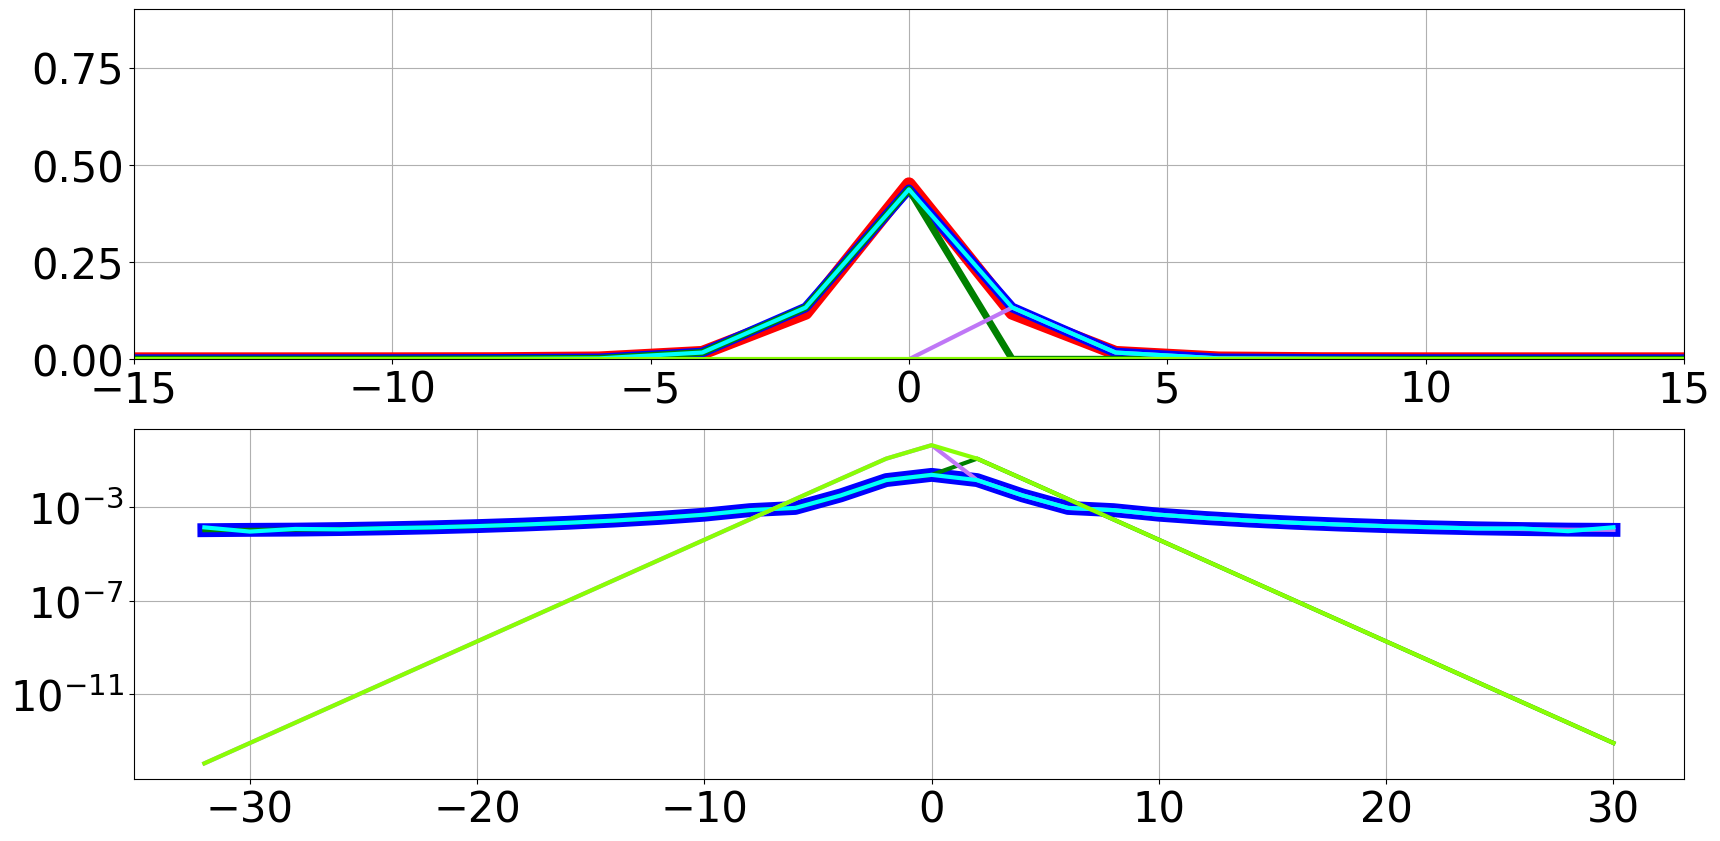

In [485]:
color = ['red', 'blue', 'green', 'xkcd:light purple', 'xkcd:cyan', 'xkcd:lime green']
fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=np.absolute(q)))
fig.add_trace(go.Scatter(x=t, y=np.absolute(q_tib_total)))
fig.show()

In [985]:
color = ['red', 'blue', 'green', 'xkcd:light purple', 'xkcd:cyan', 'xkcd:lime green']
fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=np.absolute(q - q_tib_total)))
fig.show()

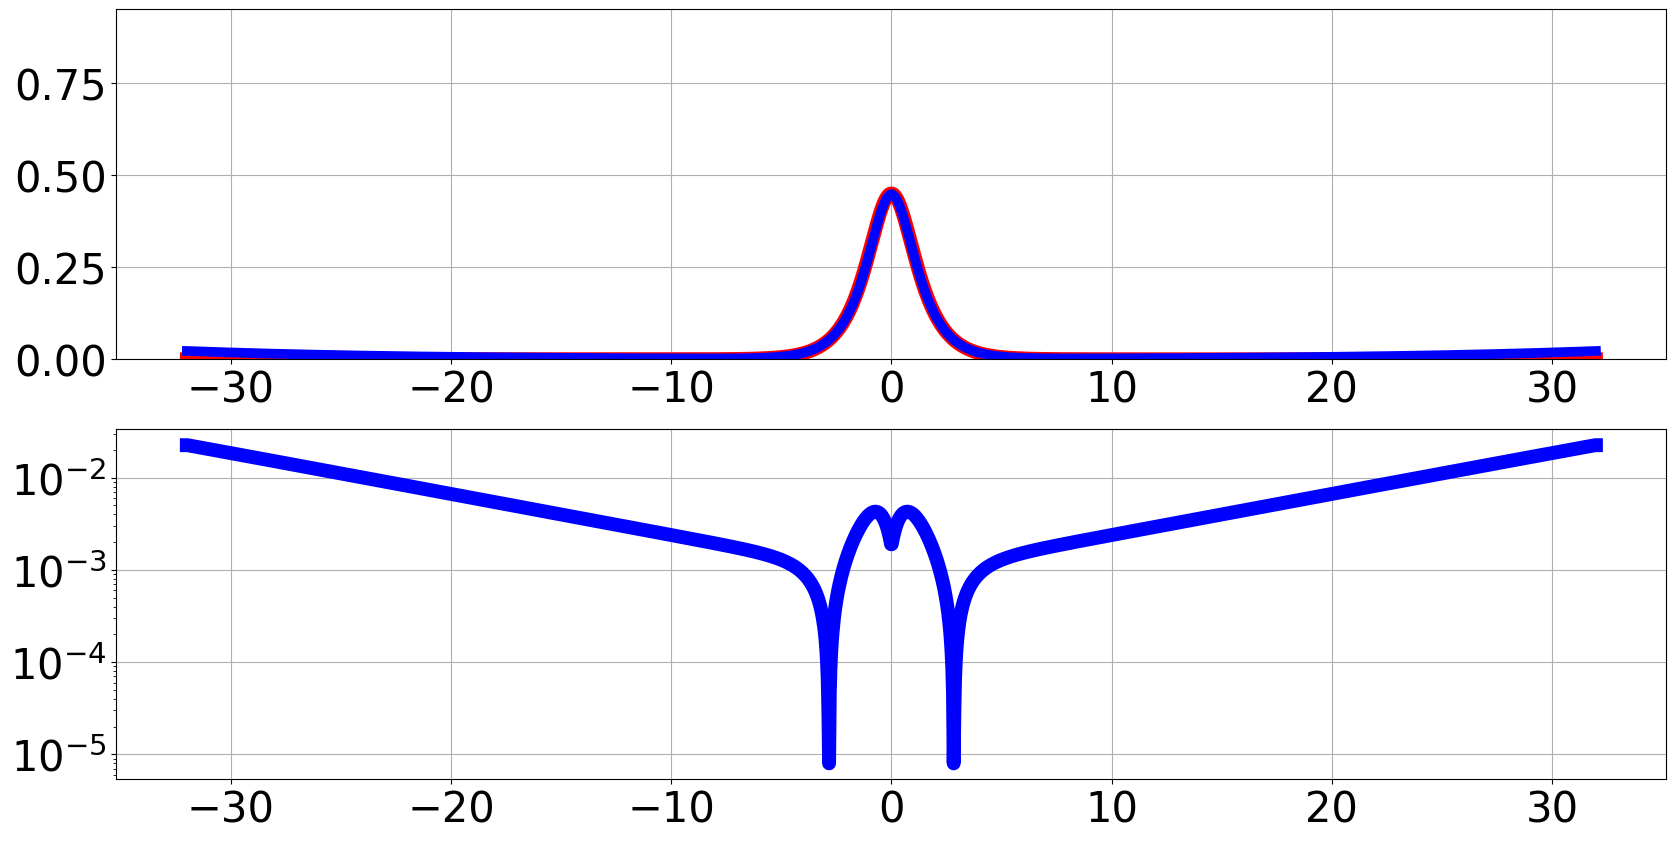

In [154]:
matplotlib.rcParams.update({'font.size': 30})
color = ['red', 'blue', 'green', 'xkcd:light purple', 'xkcd:cyan', 'xkcd:lime green']
fig, axs = plt.subplots(2, 1, figsize=(20, 10))
axs[0].plot(t, np.absolute(q), color[0], linewidth=10)
axs[0].plot(t, np.absolute(q_tib_total), color[1], linewidth=7)
#axs[0].plot(t, np.absolute(q_tib_left), color[2], linewidth=5)
#axs[0].plot(t, np.absolute(q_tib_right), color[3], linewidth=3)
#axs[0].plot(t, np.absolute(q_fnft), color[4], linewidth=3)
#axs[0].plot(t, np.absolute(q_fnft_still), color[5], linewidth=3)
axs[0].grid(True)
#axs[0].set_xlim(-15, 15)
axs[0].set_ylim(0, ampl + 0.5)

axs[1].plot(t, np.absolute(q - q_tib_total), color[1], linewidth=10)
#axs[1].plot(t, np.absolute(q - q_tib_left), color[2], linewidth=3)
#axs[1].plot(t, np.absolute(q - q_tib_right), color[3], linewidth=3)
#axs[1].plot(t, np.absolute(q - q_fnft), color[4], linewidth=3)
#axs[1].plot(t, np.absolute(q - q_fnft_still), color[5], linewidth=3)
axs[1].grid(True)
axs[1].set_yscale('log')

#set y ticks
y_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
axs[1].yaxis.set_major_locator(y_major)
y_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
axs[1].yaxis.set_minor_locator(y_minor)
axs[1].yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

## WITH PROPAGATION

In [197]:
import nft_analyse as nft
reload(nft)

z_back = z_prop
xi_upsampling = 1
forward_continuous_type='fnft'
forward_discrete_type='pjt' # 'fnft'
forward_discrete_coef_type='bi-direct'
inverse_type='both'
fnft_type=0
nft_type='bo'
use_contour = False
n_discrete_skip = 2

res_dbp = nft.make_dbp_nft(q_prop, t, z_back, xi_upsampling=xi_upsampling,
                           forward_continuous_type=forward_continuous_type,
                           forward_discrete_type=forward_discrete_type,
                           forward_discrete_coef_type=forward_discrete_coef_type,
                           inverse_type=inverse_type,
                           fnft_type=fnft_type, nft_type=nft_type,
                           use_contour=use_contour, n_discrete_skip=n_discrete_skip,
                           print_sys_message=True)

q_tib_total = res_dbp['q_total']
q_tib_left = res_dbp['q_tib_left']
q_tib_right = res_dbp['q_tib_right']
q_fnft = res_dbp['q_fnft']

xi_d_calculated = res_dbp['xi_d']
print(xi_d_calculated)
print(xi_discr)




# for fnft len(xi) == len(q)
res = nsev_inverse(xi, t, b_xi, xi_discr, b_discr / ad_discr, cst=1, dst=0, dis=fnft_type)
q_fnft_still = res['q']

print(np.shape(b_xi), np.shape(xi))

Time to calculate discrete spectrum 0.9990000000000001 ms
Number of discrete eigenvalues: 0
Time to calculate continuous part of Omega 219.0 ms
Time to calculate discrete part of Omega 0.0 ms
Time to calculate TIB 91.0 ms
Time to calculate continuous part of Omega 222.0 ms
Time to calculate discrete part of Omega 0.0 ms
Time to calculate TIB 26.0 ms
Time to calculate all TIBs 558.0 ms
Time to calculate inverse FNFT 25.0 ms
[]
[-0.-0.05j]
(2048,) (2048,)


C:\ProgramData\Anaconda3\envs\tensorflow_2_9\lib\site-packages\fnftpy-0.3.0-py3.9.egg\FNFTpy\auxiliary.py:158: UserWarning: An error occured when calling FNFT: error code 7


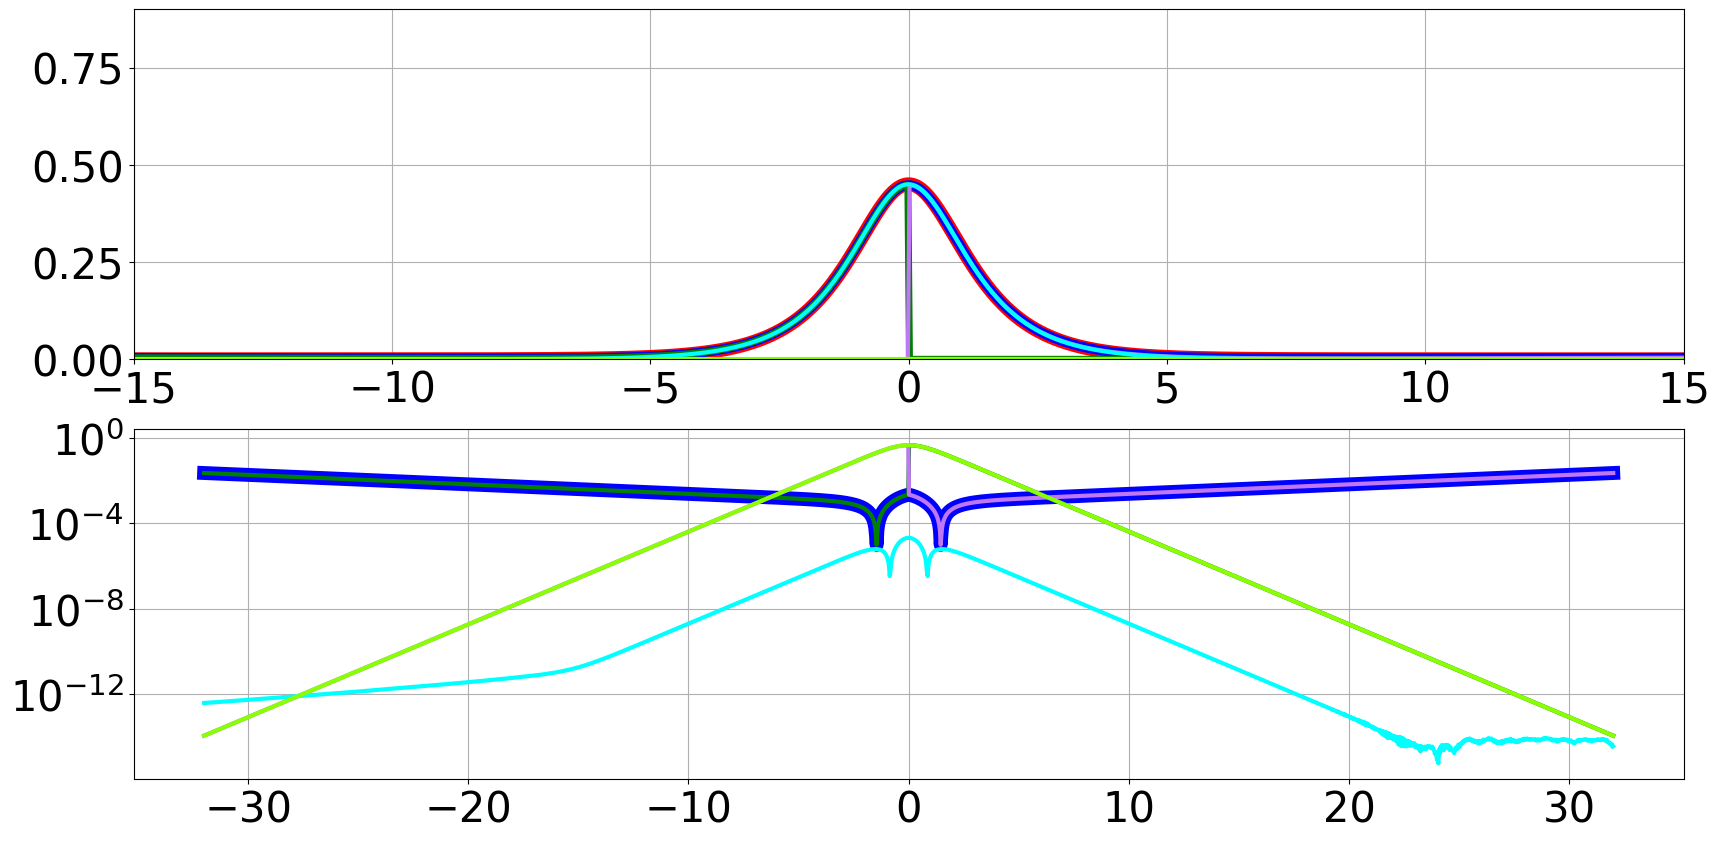

In [198]:
matplotlib.rcParams.update({'font.size': 30})
color = ['red', 'blue', 'green', 'xkcd:light purple', 'xkcd:cyan', 'xkcd:lime green']
fig, axs = plt.subplots(2, 1, figsize=(20, 10))
axs[0].plot(t, np.absolute(q), color[0], linewidth=10)
axs[0].plot(t, np.absolute(q_tib_total), color[1], linewidth=7)
axs[0].plot(t, np.absolute(q_tib_left), color[2], linewidth=5)
axs[0].plot(t, np.absolute(q_tib_right), color[3], linewidth=3)
axs[0].plot(t, np.absolute(q_fnft), color[4], linewidth=3)
axs[0].plot(t, np.absolute(q_fnft_still), color[5], linewidth=3)
axs[0].grid(True)
axs[0].set_xlim(-15, 15)
axs[0].set_ylim(0, 2*ampl)

axs[1].plot(t, np.absolute(q - q_tib_total), color[1], linewidth=10)
axs[1].plot(t, np.absolute(q - q_tib_left), color[2], linewidth=3)
axs[1].plot(t, np.absolute(q - q_tib_right), color[3], linewidth=3)
axs[1].plot(t, np.absolute(q - q_fnft), color[4], linewidth=3)
axs[1].plot(t, np.absolute(q - q_fnft_still), color[5], linewidth=3)
axs[1].grid(True)
axs[1].set_yscale('log')

#set y ticks
y_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
axs[1].yaxis.set_major_locator(y_major)
y_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
axs[1].yaxis.set_minor_locator(y_minor)
axs[1].yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

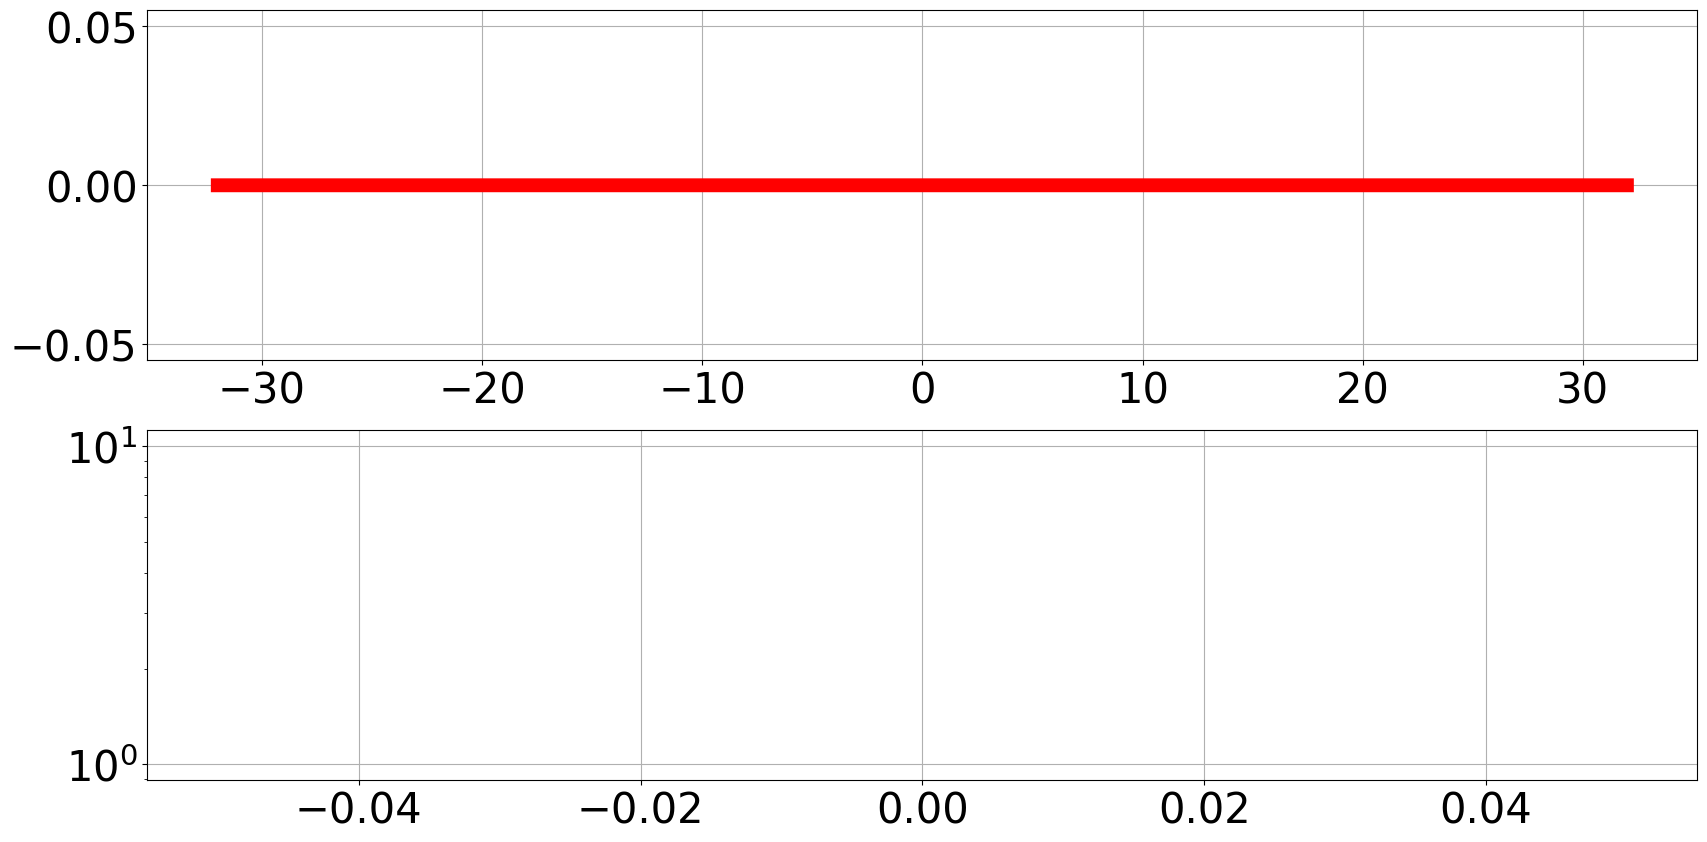

In [50]:
matplotlib.rcParams.update({'font.size': 30})
color = ['red', 'blue', 'green', 'xkcd:light purple', 'xkcd:cyan']
fig, axs = plt.subplots(2, 1, figsize=(20, 10))
axs[0].plot(t, np.absolute(res_dbp['b_prop']), color[0], linewidth=10)
axs[0].plot(t, np.absolute(b_xi), color[1], linewidth=7)
axs[0].grid(True)
# axs[0].set_xlim(-5, 5)
# axs[0].set_ylim(0, ampl + 0.5)

axs[1].plot(t, np.absolute(res_dbp['b_prop'] - b_xi), color[1], linewidth=10)
axs[1].grid(True)
axs[1].set_yscale('log')

#set y ticks
y_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
axs[1].yaxis.set_major_locator(y_major)
y_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
axs[1].yaxis.set_minor_locator(y_minor)
axs[1].yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

## Test bi-directional for arbitrary spectral parameter

In [56]:
reload(nft)
contour_ampl = 0.1
xi_span_test = 2
n_xi_test = 2 ** 7
xi_test = nft.get_raised_contour(contour_ampl, xi_span_test, n_xi_test)

a_test, b_test = nft.do_bi_direct_arbitrary_array(q, t, xi_test, 'tes4')
b_xi_test = test_signals.get_sech_b_coef(xi_test, ampl, chirp)



In [29]:
print(xi_discr)
print(nft.do_bi_direct_arbitrary(q, t, xi_discr[0], 'tes4'))

[0.+1.4993749j 0.+0.4993749j]
((5.5508636205285225e-08-4.334753515793568e-18j), (-0.9982872214516879+0.044181522832452066j))


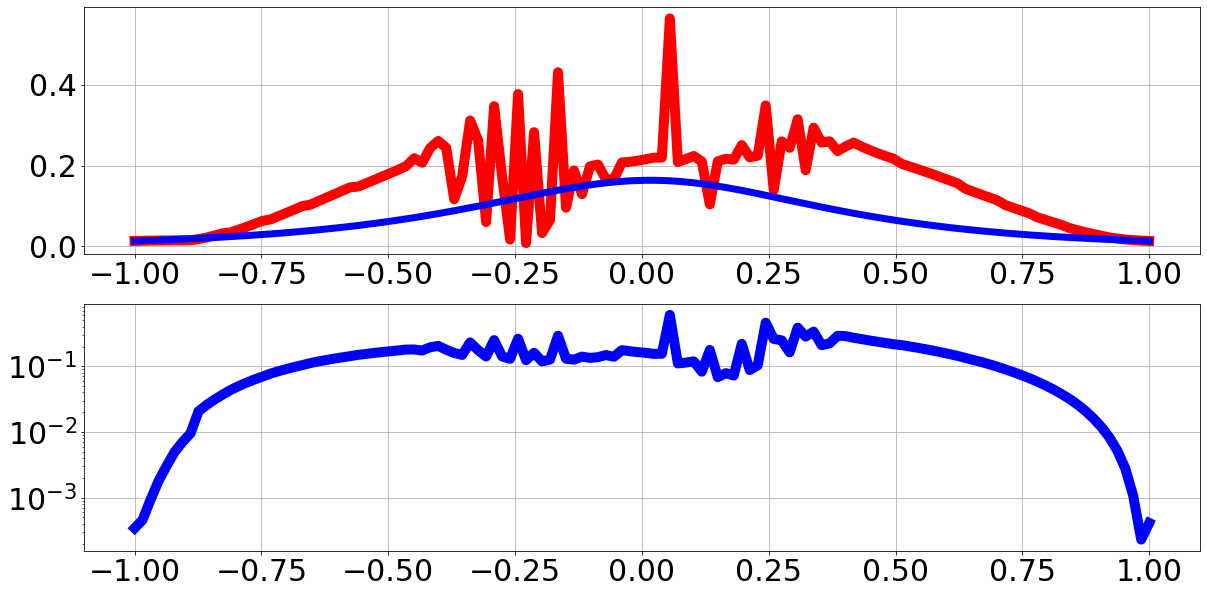

In [57]:
matplotlib.rcParams.update({'font.size': 30})
color = ['red', 'blue', 'green', 'xkcd:light purple', 'xkcd:cyan']
fig, axs = plt.subplots(2, 1, figsize=(20, 10))
axs[0].plot(np.real(xi_test), np.absolute(b_test), color[0], linewidth=10)
axs[0].plot(np.real(xi_test), np.absolute(b_xi_test), color[1], linewidth=7)
axs[0].grid(True)
# axs[0].set_xlim(-5, 5)
# axs[0].set_ylim(0, ampl + 0.5)

axs[1].plot(np.real(xi_test), np.absolute(b_test - b_xi_test), color[1], linewidth=10)
axs[1].grid(True)
axs[1].set_yscale('log')

#set y ticks
y_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
axs[1].yaxis.set_major_locator(y_major)
y_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
axs[1].yaxis.set_minor_locator(y_minor)
axs[1].yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())